<a href="https://colab.research.google.com/github/santanu-dey/machine-learning-notebooks/blob/master/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [0]:
import pandas as pd

In [0]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [0]:
val_housing_win_df = pd.read_csv("https://raw.githubusercontent.com/noahgift/socialpowernba/master/data/nba_2017_att_val_elo_win_housing.csv")

In [7]:
val_housing_win_df.head()

,TEAM,GMS,PCT_ATTENDANCE,WINNING_SEASON,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,CONF,COUNTY,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS
0,Chicago Bulls,41,104,1,0.889,2500,1519,East,Cook,269900.000,5.200
1,Dallas Mavericks,41,103,0,0.811,1450,1420,West,Dallas,314990.000,2.570
2,Sacramento Kings,41,101,0,0.722,1075,1393,West,Sacremento,343950.000,1.510
3,Miami Heat,41,100,1,0.805,1350,1569,East,Miami-Dade,389000.000,2.710
4,Toronto Raptors,41,100,1,0.813,1125,1600,East,York-County,390000.000,1.100


In [0]:
numerical_housing_df = val_housing_win_df[["TOTAL_ATTENDANCE_MILLIONS", "ELO", "VALUE_MILLIONS", "MEDIAN_HOME_PRICE_COUNTY_MILLIONS"]].copy()

Now we select the numerical fields in a new dataframe using copy. 
Interesting thing is that the float number formatting option is still working in the copied dataframe. 

In [12]:
numerical_housing_df.head()

,TOTAL_ATTENDANCE_MILLIONS,ELO,VALUE_MILLIONS,MEDIAN_HOME_PRICE_COUNTY_MILLIONS
0,0.889,1519,2500,269900.000
1,0.811,1420,1450,314990.000
2,0.722,1393,1075,343950.000
3,0.805,1569,1350,389000.000
4,0.813,1600,1125,390000.000


# Format Numerical Fields for ML Function

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [16]:
print(scaler.fit(numerical_housing_df))


MinMaxScaler(copy=True, feature_range=(0, 1))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
print(scaler.transform(numerical_housing_df))

[[1.         0.41898148 0.68627451 0.08776879]
 [0.72637903 0.18981481 0.2745098  0.11603661]
 [0.41067502 0.12731481 0.12745098 0.13419221]
 [0.70531986 0.53472222 0.23529412 0.16243496]
 [0.73232332 0.60648148 0.14705882 0.16306188]
 [0.62487072 0.68981481 0.49019608 0.31038806]
 [0.83819102 0.47916667 0.17647059 0.00476459]
 [0.6983872  1.         0.7254902  0.39188139]
 [0.49678606 0.47453704 0.10784314 0.04993825]
 [0.72417286 0.08333333 1.         1.        ]
 [0.54749962 0.57638889 0.56862745 0.23139615]
 [0.60477873 0.06712963 0.88235294 0.31038806]
 [0.65812204 0.52083333 0.11764706 0.184816  ]
 [0.52863955 0.74768519 0.16666667 0.08156228]
 [0.70957335 0.64583333 0.0627451  0.13983449]
 [0.43166712 0.03240741 0.06666667 0.10657639]
 [0.20301662 0.33333333 0.         0.10350448]
 [0.31881029 0.61111111 0.35294118 0.09062441]
 [0.36376665 0.00462963 0.1372549  0.10350448]
 [0.27883458 0.43518519 0.05098039 0.00946649]
 [0.25319364 0.33333333 0.01568627 0.01573569]
 [0.3708405  

# Cluster the data using Scikit learn

In [21]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=5)
kmeans = k_means.fit(scaler.transform(numerical_housing_df))
val_housing_win_df['cluster'] = kmeans.labels_
val_housing_win_df.head(50)

,TEAM,GMS,PCT_ATTENDANCE,WINNING_SEASON,TOTAL_ATTENDANCE_MILLIONS,VALUE_MILLIONS,ELO,CONF,COUNTY,MEDIAN_HOME_PRICE_COUNTY_MILLIONS,COUNTY_POPULATION_MILLIONS,cluster
0,Chicago Bulls,41,104,1,0.889,2500,1519,East,Cook,269900.000,5.200,1
1,Dallas Mavericks,41,103,0,0.811,1450,1420,West,Dallas,314990.000,2.570,3
2,Sacramento Kings,41,101,0,0.722,1075,1393,West,Sacremento,343950.000,1.510,0
3,Miami Heat,41,100,1,0.805,1350,1569,East,Miami-Dade,389000.000,2.710,3
4,Toronto Raptors,41,100,1,0.813,1125,1600,East,York-County,390000.000,1.100,3
5,Los Angeles Clippers,41,100,1,0.783,2000,1636,West,Los Angeles,625000.000,10.100,1
6,Cleveland Cavaliers,41,100,1,0.843,1200,1545,East,Cuyahoga,137500.000,1.260,3
7,Golden State Warriors,41,100,1,0.803,2600,1770,West,Alameda,754990.000,1.500,1
8,Oklahoma City Thunder,41,100,1,0.746,1025,1543,West,Oklahoma,209556.500,0.780,3
9,New York Knicks,41,100,0,0.811,3300,1374,East,New York,1725000.000,1.640,4


# Now Plot the data in a Graph

In [0]:
import matplotlib.pyplot as plt

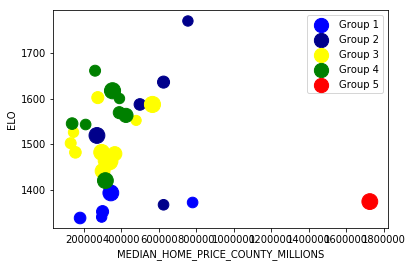

In [42]:
ax = val_housing_win_df[val_housing_win_df.cluster==0].plot.scatter(x='MEDIAN_HOME_PRICE_COUNTY_MILLIONS', y='ELO', s=val_housing_win_df['VALUE_MILLIONS']/10, color='Blue', label='Group 1');
val_housing_win_df[val_housing_win_df.cluster==1].plot.scatter(x='MEDIAN_HOME_PRICE_COUNTY_MILLIONS', y='ELO', s=val_housing_win_df['VALUE_MILLIONS']/10, color='DarkBlue', label='Group 2',  ax=ax);
val_housing_win_df[val_housing_win_df.cluster==2].plot.scatter(x='MEDIAN_HOME_PRICE_COUNTY_MILLIONS', y='ELO', s=val_housing_win_df['VALUE_MILLIONS']/10, color='Yellow', label='Group 3',  ax=ax);
val_housing_win_df[val_housing_win_df.cluster==3].plot.scatter(x='MEDIAN_HOME_PRICE_COUNTY_MILLIONS', y='ELO', s=val_housing_win_df['VALUE_MILLIONS']/10, color='Green', label='Group 4',  ax=ax);
val_housing_win_df[val_housing_win_df.cluster==4].plot.scatter(x='MEDIAN_HOME_PRICE_COUNTY_MILLIONS', y='ELO', s=val_housing_win_df['VALUE_MILLIONS']/10, color='Red', label='Group 5',  ax=ax);


